In [2]:
from pathlib import Path

data_dir = Path("experiment_data") / "scale_free_bfeeb118-a877-11ed-9901-fff9dab51560"

In [3]:
from motif_position_tooling.utils.motif_io import MotifGraph, MotifGraphWithRandomization

In [4]:
from os import listdir

motif_graphs = [
    MotifGraphWithRandomization(data_dir / i, "scale_free_graph.edgelist")
    for i in listdir(data_dir)
]

# Experiment Vis

In [5]:
from motif_position_tooling.utils.motif_significance.freq_loader import get_all_motif_frequencies_of_randomized_graphs, get_all_motif_frequencies_of_graphs
from motif_position_tooling.utils.motif_significance.z_score import get_z_scores_for_motifs, z_score

In [6]:
k = 4

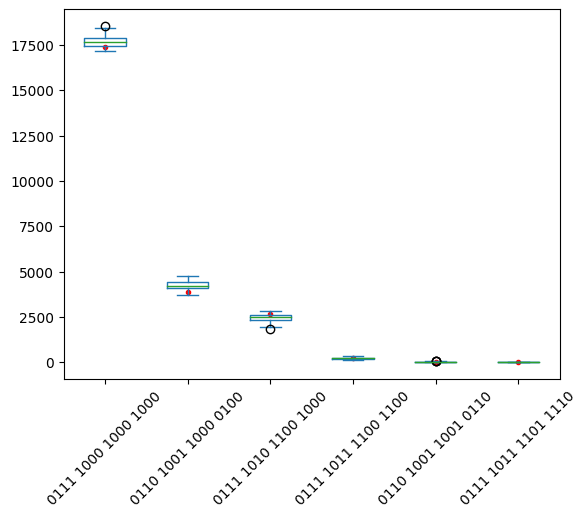

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_motif_frequencies(randomized_motif_graph, motif_size):
    random_freq = get_all_motif_frequencies_of_randomized_graphs(
        randomized_motif_graph,
        motif_size,
    )
    scale_free_freq = get_all_motif_frequencies_of_graphs([randomized_motif_graph], motif_size)

    # Plot bar for each key (different motifs)
    # Plot bars for
    fig, ax = plt.subplots(1, 1)
    pd.DataFrame(random_freq).plot.box(ax=ax)

    ax.scatter(ax.get_xticks(), scale_free_freq.values(), color="red", marker=".")
    plt.xticks(rotation = 45)
plot_motif_frequencies(motif_graphs[0], 4)

In [8]:
from pprint import pprint

random_freq = get_all_motif_frequencies_of_randomized_graphs(
    motif_graphs[0],
    k,
)

scale_free_freq = get_all_motif_frequencies_of_graphs(motif_graphs, k)

from statistics import mean

pprint(dict(map(lambda kv: (kv[0], mean(kv[1])), random_freq.items())))
pprint(dict(map(lambda kv: (kv[0], mean(kv[1])), scale_free_freq.items())))

{'0110 1001 1000 0100': 4230.3,
 '0110 1001 1001 0110': 32.33,
 '0111 1000 1000 1000': 17681.15,
 '0111 1010 1100 1000': 2455.15,
 '0111 1011 1100 1100': 223.55,
 '0111 1011 1101 1110': 19.4}
{'0110 1001 1000 0100': 3867.52,
 '0110 1001 1001 0110': 36.84,
 '0111 1000 1000 1000': 25158.19,
 '0111 1010 1100 1000': 2151.06,
 '0111 1011 1100 1100': 174.48,
 '0111 1011 1101 1110': 11.87}


In [9]:
collected_z_scores = {}
for i, motif_graph in enumerate(motif_graphs):
    z_scores = get_z_scores_for_motifs(
        motif_graph,
        k,
    )
    collected_z_scores[i] = z_scores

pd.DataFrame(collected_z_scores)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0111 1000 1000 1000,-1.020562,0.129568,0.678017,0.153962,-0.602964,-0.366771,0.688661,1.402893,1.362024,1.271060,...,0.309599,0.903687,1.106696,0.991989,0.112952,2.572885,2.316634,1.033459,-0.823494,2.162089
0110 1001 1000 0100,-1.447461,-0.679791,0.608782,0.603764,-0.679280,-0.387448,1.079495,1.225245,1.054837,0.002946,...,1.340445,-0.035582,1.519906,0.957693,0.948831,2.916256,-0.016063,1.051580,-0.154409,2.038085
0111 1010 1100 1000,0.921783,-0.156603,-0.866326,-0.316323,0.510464,0.335828,-0.478983,-1.758530,-1.383724,-1.788413,...,-0.434578,-1.019960,-1.072528,-1.127976,-0.018793,-2.737181,-2.608415,-1.265139,0.865218,-2.407204
0111 1011 1100 1100,0.777181,0.136684,-0.005409,0.217504,0.267766,0.146600,-1.025474,-0.512117,-0.886432,0.613046,...,-0.013440,-0.632532,-0.962895,-0.542570,-0.597860,-1.496924,-1.481118,0.295435,0.495932,-0.671181
0111 1011 1101 1110,1.723043,-0.552299,0.284730,0.407947,2.282756,1.806710,-1.007310,-0.588978,-0.929105,-1.341061,...,0.108671,1.426224,-1.166267,-0.494430,0.383689,-1.210618,-0.649990,0.295729,1.295119,NaN
0110 1001 1001 0110,-0.639547,-0.834006,-0.382512,-0.473832,-0.322865,-0.729418,0.140692,0.609221,-0.374724,0.065974,...,-0.186986,-0.223403,0.080624,-0.250933,-0.822624,0.958626,2.953363,-0.241410,-1.069653,0.901012


0111 1000 1000 1000
0110 1001 1000 0100
0111 1010 1100 1000
0111 1011 1100 1100
0111 1011 1101 1110
0110 1001 1001 0110


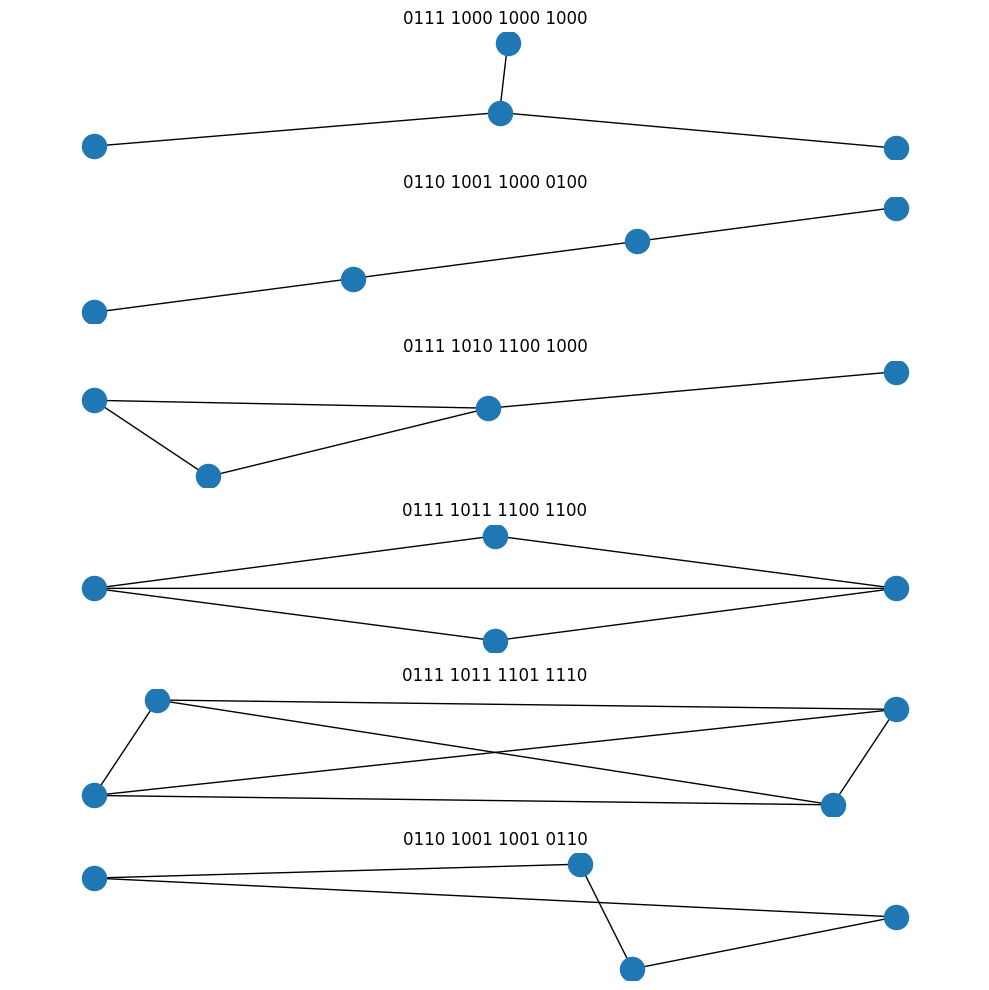

In [11]:
import matplotlib.pyplot as plt
import networkx as nx

from motif_position_tooling.utils.motif_id_to_graph import motif_id_to_graph

fig, axes = plt.subplots(len(scale_free_freq), 1, figsize=(10, 10))
for i, motif_id in enumerate(scale_free_freq):
    nx.draw(motif_id_to_graph(motif_id), ax=axes[i])
    axes[i].set_title(motif_id)
    print(motif_id)
    
fig.tight_layout()